In [10]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
#reading in training data from 2018-2020 seasons
players = pd.read_csv("data/train/18-20.csv")

In [3]:
#we will only look at half PPR scoring since it is the most popular scoring system and balanced overall according to experts
players = players.drop(["StandardFantasyPoints", "PPRFantasyPoints"], axis = 1)

In [4]:
#creating separate models for different positions
qb = players[players['Pos'] == 'QB']
rb = players[players['Pos'] == 'RB']
wr = players[players['Pos'] == 'WR']
te = players[players['Pos'] == 'TE']

In [5]:
#start by looking at qb data
qb

,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,Rec,Tgt,ReceivingYds,ReceivingTD,FL,HalfPPRFantasyPoints
27,Patrick Mahomes,QB,KAN,211,3,0,32,24,0,0,0,0,0,0,0,0,20.44
72,Deshaun Watson,QB,HTX,253,1,1,32,20,6,27,1,0,0,0,0,0,20.82
85,Matt Ryan,QB,ATL,450,2,1,54,37,1,-1,0,0,0,0,0,0,23.90
173,Russell Wilson,QB,SEA,322,4,0,35,31,3,29,0,0,0,0,0,0,31.78
191,Josh Allen,QB,BUF,312,2,0,46,33,14,57,1,0,0,0,0,2,28.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32338,Nathan Peterman,QB,BUF,188,0,3,49,31,8,47,1,0,0,0,0,0,12.22
32339,A.J. McCarron,QB,OAK,8,0,0,3,1,1,0,0,0,0,0,0,0,0.32
32342,Sam Darnold,QB,NYJ,229,0,4,39,21,0,0,0,0,0,0,0,0,1.16
32394,Taysom Hill,QB,NOR,0,0,0,0,0,2,10,0,0,0,0,0,0,1.00


In [6]:
#here we can observe which features are most strongly correlated with points earned
qb.corr()["HalfPPRFantasyPoints"]

PassingYds              0.792746
PassingTD               0.831133
Int                    -0.077117
PassingAtt              0.606283
Cmp                     0.680914
RushingAtt              0.371039
RushingYds              0.372035
RushingTD               0.366179
Rec                    -0.038982
Tgt                    -0.052017
ReceivingYds           -0.023533
ReceivingTD             0.015967
FL                     -0.008734
HalfPPRFantasyPoints    1.000000
Name: HalfPPRFantasyPoints, dtype: float64

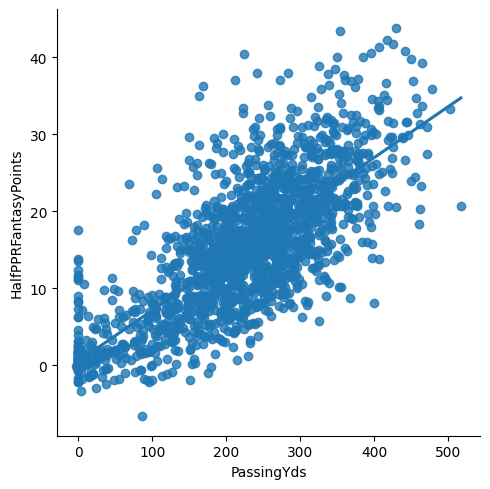

In [7]:
#strong correlation
sns.lmplot(x = "PassingYds", y = "HalfPPRFantasyPoints", data = qb, fit_reg = True, ci = None)

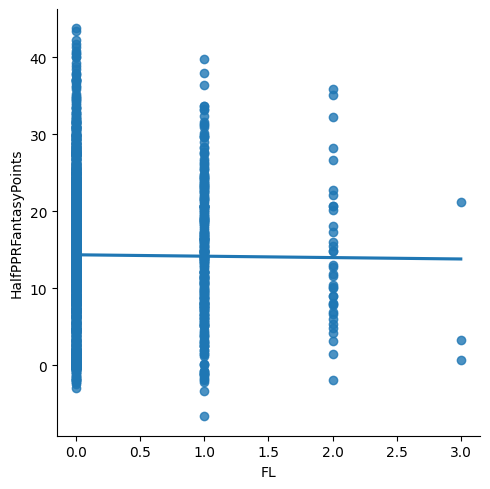

In [8]:
#almost no correlation
sns.lmplot(x = "FL", y = "HalfPPRFantasyPoints", data = qb, fit_reg = True, ci = None)

<AxesSubplot:ylabel='Frequency'>

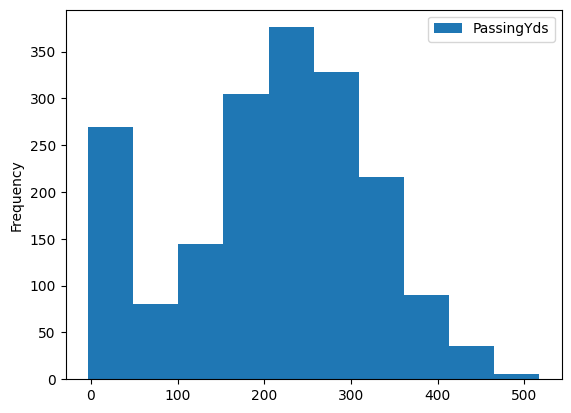

In [9]:
qb.plot.hist(y = "PassingYds")
#Most qbs obtain around 200-300 passing yards per game
#notice there is an uneven distribution at the 0-50 bin, likely from backup qbs who didn't have much playing time 

In [15]:
reg = LinearRegression()

In [16]:
qb_predictors = ["PassingYds", "PassingTD", "PassingAtt", "Cmp", "RushingAtt", "RushingYds", "RushingTD"]
target = "HalfPPRFantasyPoints"

In [17]:
reg.fit(qb[qb_predictors], qb[target])

LinearRegression()

In [ ]:
predictions = reg.predict()